In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Kullanacağımız kütüphaneleri ve fonksiyonları ekliyoruz.
* Pandas kütüphanesini veri setini csv formatında okumak için kullanacağız.
* Matplotlib kütüphanesini verileri görsel olarak görüp analiz edebilmek için kullanacağız.

In [2]:
cancer_data = pd.read_csv("Cancer_data.csv")
data = cancer_data.copy()
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Veri setini csv formatında okuduk. Yapacağımız işlemlerde ana veri setini kaybetmemek için bir kopyasını oluşturduk. İşlemleri bu oluşturduğumuz kopya üzerinden yapacağız.

In [3]:
data.drop(["id"], axis = 1, inplace = True)
data.drop(["Unnamed: 32"], axis = 1, inplace = True)

Verideki kullanmayacağımız "id" sütununu ve boş olan "Unnamed: 32" sütununu atıyoruz.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [5]:
#Diagnosis (M = malignant, B = benign)
data["diagnosis"] = data["diagnosis"].replace({"M": 1, "B": 0})

"Diagnosis" sütunu 2 veri içeriyor ve bunlar "M = malignant(kötü huylu)" ve "B = benign(iyi huylu)". Yani bu sütun bize kişinin kanser olup olmadığını gösteriyor. Bizim eğitimdeki amacımız test verisindeki bu sütunu tahmin edip kişiye tanı koymak.

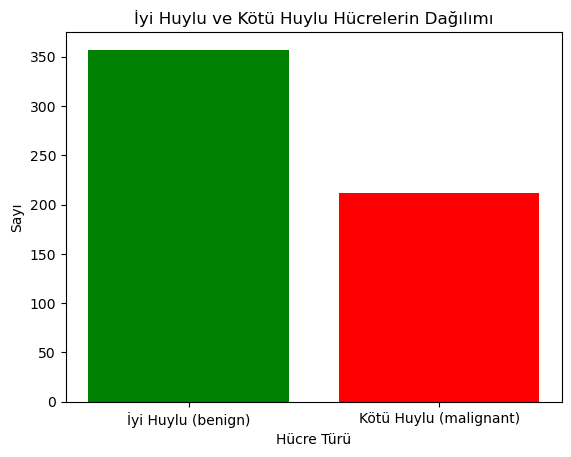

In [6]:
diagnosis_sayı = data["diagnosis"].value_counts()
plt.bar(["İyi Huylu (benign)", "Kötü Huylu (malignant)"], diagnosis_sayı.values, color=['green', 'red'])
plt.title("İyi Huylu ve Kötü Huylu Hücrelerin Dağılımı")
plt.xlabel("Hücre Türü")
plt.ylabel("Sayı")
plt.show()

In [7]:
relations = data.corr()
print(relations.iloc[0])

diagnosis                  1.000000
radius_mean                0.730029
texture_mean               0.415185
perimeter_mean             0.742636
area_mean                  0.708984
smoothness_mean            0.358560
compactness_mean           0.596534
concavity_mean             0.696360
concave points_mean        0.776614
symmetry_mean              0.330499
fractal_dimension_mean    -0.012838
radius_se                  0.567134
texture_se                -0.008303
perimeter_se               0.556141
area_se                    0.548236
smoothness_se             -0.067016
compactness_se             0.292999
concavity_se               0.253730
concave points_se          0.408042
symmetry_se               -0.006522
fractal_dimension_se       0.077972
radius_worst               0.776454
texture_worst              0.456903
perimeter_worst            0.782914
area_worst                 0.733825
smoothness_worst           0.421465
compactness_worst          0.590998
concavity_worst            0

Burada korelasyon matrisi ile veriler arasındaki ilişkiyi inceledik. Bütün değerlerin birbiri ile olan ilişkisi 1 ve -1 arasında değerler aldı. Değer sıfırdan ne kadar uzak olursa veriler arasında o kadar güçlü bir ilişki olur. Bizim ilgilendiğimiz sütun "diagnosis" sütunu. Bu yüzden "relations.iloc[0]" komutu ile korelasyon matrisinde onun ilişkilerini gösteren satırı seçtik. "diagnosis" ile ilişkili olan kullanabileceğimiz veriler şunlar : 
* radius_mean
* perimeter_mean
* area_mean
* concavity_mean
* concave points_mean
* radius_worst
* perimeter_worst
* area_worst
* concavity_worst
* concave points_worst

Yani eğitimde kullanacağımız veriler radius, perimeter, area, concavity ve concave points verileridir. Şimdi bu verilerle diagnosis sütunun ilişkisini daha iyi görebilmek için seaborn kütüphanesi ile grafik çizelim.

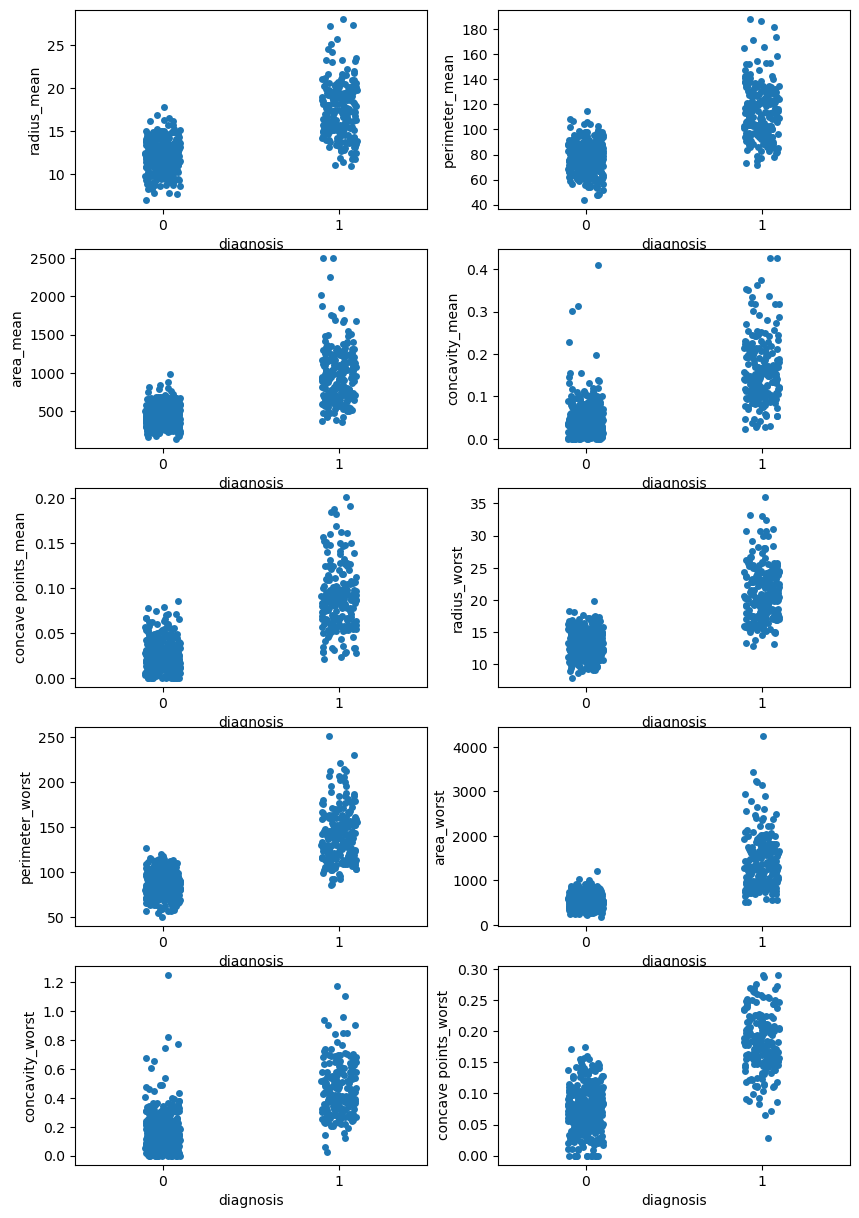

In [8]:
list_y = ["radius_mean", "perimeter_mean", "area_mean", "concavity_mean", "concave points_mean",
          "radius_worst", "perimeter_worst", "area_worst", "concavity_worst", "concave points_worst" ]
fig, axes = plt.subplots(5, 2, figsize=(10, 15))
axes = axes.ravel()
for i in range (len(list_y)):
    plt.rcParams.update({'font.size': 8})
    plt.figure(figsize=(5, 3))
    sns.stripplot(x = "diagnosis", y = list_y[i], data = data, jitter = True, ax = axes[i])
    plt.tight_layout()
    plt.close()

In [9]:
#Veri setni bağımlı ve bağımsız değişkenlere ayırıyoruz.
y = data["diagnosis"]  #Bağımlı değişken 
X = data[["radius_mean", "perimeter_mean", "area_mean", "concavity_mean", "concave points_mean",
          "radius_worst", "perimeter_worst", "area_worst", "concavity_worst", "concave points_worst"]] #Bağımsız değişkenler

# Sınıflandırma Algoritmaları İle Modelleri Oluşturalım

In [10]:
from sklearn.model_selection import train_test_split  #train test split metodunu ekledi

In [11]:
from sklearn.metrics import accuracy_score  #Modelin doğruluk skorunu gösteren fonksiyon

# Lojistik Regresyon Modeli

In [12]:
from sklearn.linear_model import LogisticRegression  #Lojistik regresyon modelini ekledik

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  #modeli test ve eğitim setine ayırdık
logistik_model = LogisticRegression()
logistik_model.fit(X_train, y_train)
y_tahmin_lg = logistik_model.predict(X_test)
dogruluk_skoru_lg = accuracy_score(y_test, y_tahmin_lg)
print("Modelin Doğruluk Skoru : ", dogruluk_skoru_lg)

Modelin Doğruluk Skoru :  0.9824561403508771


Bu modelin eğitim setinde tümör ile ilişkisi olan bütün verileri kullandık. Modelin tahminlerindeki başarı oranı %98.

# Gaussian Naive Bayes Modeli

In [13]:
from sklearn.naive_bayes import GaussianNB

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_tahmin_nb = nb_model.predict(X_test)
dogruluk_skoru_nb = accuracy_score(y_test, y_tahmin_nb)
print("Modelin Doğruluk Skoru : ", dogruluk_skoru_nb)

Modelin Doğruluk Skoru :  0.9590643274853801


# KNN Modeli

In [14]:
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_tahmin_knn = knn_model.predict(X_test)
dogruluk_skoru_knn = accuracy_score(y_test, y_tahmin_knn)
print("Modelin Doğruluk Skoru : ", dogruluk_skoru_knn)

Modelin Doğruluk Skoru :  0.9590643274853801


# SVC Modeli

In [15]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
svc_model = SVC(kernel = "linear")
svc_model.fit(X_train, y_train)
y_tahmin_svc = svc_model.predict(X_test)
dogruluk_skoru_svc = accuracy_score(y_test, y_tahmin_svc)
print("Modelin Doğruluk Skoru : ", dogruluk_skoru_svc)

Modelin Doğruluk Skoru :  0.9766081871345029


# Yapay Sinir Ağları Modeli

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
mlpc_model = MLPClassifier()
mlpc_model.fit(X_train_scaled, y_train)

y_tahmin_mlpc = mlpc_model.predict(X_test_scaled)
dogruluk_skoru_ysa = accuracy_score(y_test, y_tahmin_mlpc)
print("Modelin Doğruluk Skoru : ", dogruluk_skoru_ysa)

Modelin Doğruluk Skoru :  0.9590643274853801


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


 # Gradient Boosting Machines Modeli

In [17]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train, y_train)
y_tahmin_gmb = gbm_model.predict(X_test)
dogruluk_skoru_gbm = accuracy_score(y_test, y_tahmin_gmb)
print("Modelin Doğruluk Skoru : ", dogruluk_skoru_gbm)

Modelin Doğruluk Skoru :  0.9532163742690059


# Random Forest Modeli

In [18]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_tahmin_rf = rf_model.predict(X_test)
dogruluk_skoru_rf = accuracy_score(y_test, y_tahmin_rf)
print("Modelin Doğruluk Skoru : ", dogruluk_skoru_rf)

Modelin Doğruluk Skoru :  0.9649122807017544


# Algoritmaların Karşılaştırılması

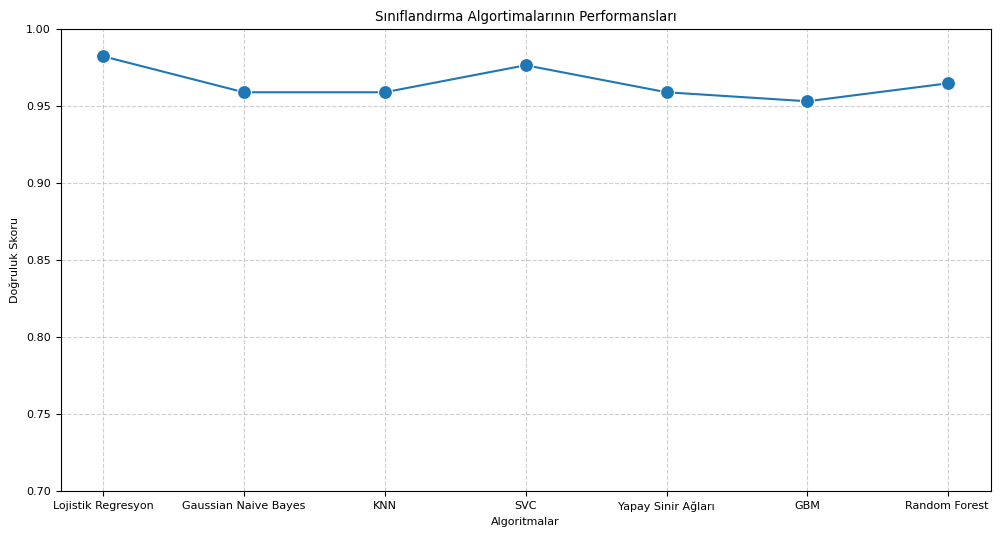

In [19]:
algoritmalar = ["Lojistik Regresyon", "Gaussian Naive Bayes", "KNN", "SVC", "Yapay Sinir Ağları", "GBM", "Random Forest "]
dogruluk_skorları = [dogruluk_skoru_lg, dogruluk_skoru_nb, dogruluk_skoru_knn, dogruluk_skoru_svc, 
                     dogruluk_skoru_ysa, dogruluk_skoru_gbm, dogruluk_skoru_rf]

data = pd.DataFrame({"Algoritmalar": algoritmalar, "Doğruluk Skoru": dogruluk_skorları})
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x="Algoritmalar", y="Doğruluk Skoru", marker='o', markersize=10)
plt.title("Sınıflandırma Algortimalarının Performansları")
plt.ylim(0.7, 1.0)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()